Muhammad Naufal Dzakki Rauf<br>
Universitas Gadjah Mada<br>
Atlas

# Analisa 4W

## WHO - Siapa yang memiliki masalah tersebut?
1. Siapa saja yang mengalami masalah tsb? <br>
Pasien rumah sakit terkait<br>
2. Siapa saja yang terlibat dalam masalah tsb?<br>
Pasien, Dokter, Tenaga medis, Rumah sakit<br>
3. Apa yang kamu ketahui tentang mereka?<br>
Bahayanya penyakit jantung, <br>

## WHAT - Apa permasalahannya sebenarnya?
1. Apa masalah utamanya?<br>
Diagnosis penyakit arteri koroner<br>
2. Apa faktor-faktor pendukung masalah tsb? (bisa tampilkan data/jurnal/info pendukung lainnya)<br>
Source: https://www.cdc.gov/heartdisease/facts.htm<br>
Penyakit arteri koroer merupakan penyakit jantung yang paling umum dan telah menewaskan 360,900 jiwa di tahun 2019, dan sekitar 2 dari 10 kematian yang disebabkan penyakit arteri koroner terjadi pada orang dewasa di bawah umur 65 tahun. Sekitar 18.2 juta orang dewasa di umur 20 tahun ke atas mengidap penyakit arteri koroner. <br>

## WHERE - Dimana/pada saat apa permasalahan ini muncul?
1. Dimana saja si calon “user” mengalami masalah ini?<br>
Penyakit ini bisa terjadi ke siapa saja dan di mana saja<br>
2. Pada kondisi seperti apa si calon “user” mengalami masalah ini?<br>
Saat tingkat kolesterol menjadi cukup tinggi dan menyumbat aliran darah di arteri<br>

## WHY - Mengapa kamu yakin masalah ini sangat penting dibahas?
1. Apa nilai utama dari permasalahan ini?<br>
Dapat mendeteksi penyakit arteri koroner dari data pasien secara akurat agar dapat segera memberikan treatment<br>
2. Bagaimana kamu bisa memperbaiki (sebagian atau seluruh) dari masalah tsb<br>
Classification model berdasarkan data check up<br>

# EDA

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel("Z-Alizadeh sani dataset.xlsx")

df.shape

(303, 56)

In [3]:
df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [5]:
df.isnull().values.any()

False

In [6]:
df.isnull().sum()

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
B

In [7]:
df.duplicated().sum()

0

In [8]:
'''
Encode target labels with value between 0 and n_classes-1
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
'''
from sklearn.preprocessing import LabelEncoder

for f in df.columns:
    if df[f].dtype == 'object':
        print (f)

        lbl = LabelEncoder()
        lbl.fit(list(df[f].values))

        df[f] = lbl.transform(list(df[f].values))

Sex
Obesity
CRF
CVA
Airway disease
Thyroid Disease
CHF
DLP
Weak Peripheral Pulse
Lung rales
Systolic Murmur
Diastolic Murmur
Dyspnea
Atypical
Nonanginal
Exertional CP
LowTH Ang
LVH
Poor R Progression
BBB
VHD
Cath


In [9]:
df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,1,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,1,0
1,67,70,157,0,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,1,0
2,54,54,164,1,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,3,0
3,66,67,158,0,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,2,1
4,50,87,153,0,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,2,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    int32  
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    int32  
 11  CRF                    303 non-null    int32  
 12  CVA                    303 non-null    int32  
 13  Airway disease         303 non-null    int32  
 14  Thyroid Disease        303 non-null    int32  
 15  CHF   

In [11]:
df.columns

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'BBB', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN',
       'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE',
       'Region RWMA', 'VHD', 'Cath'],
      dtype='object')

In [12]:
X = df.drop(columns=['Cath'], axis=1) 
y = df['Cath']

X.shape, y.shape

((303, 55), (303,))

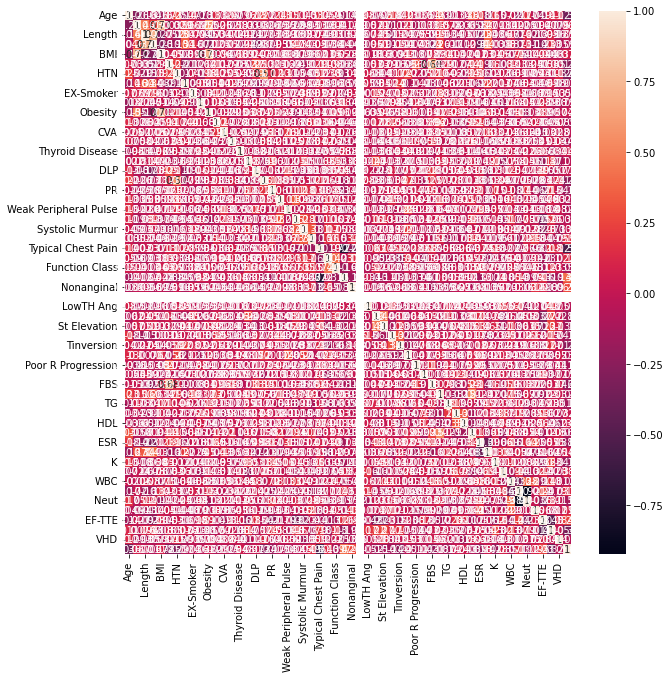

In [13]:
# Correlation Heatmap

corr = df.corr()
top_corr = corr.index

plt.figure(figsize=(10,10))
corr_plot = sns.heatmap(df[top_corr].corr(), annot=True)

## Feature Selection

In [14]:
# Feature Selection -> Feature Engineering
# Use Extra Tree Classifier fot Feature Selection

'''
Meta-transformer for selecting features based on importance weights.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

An extra-trees classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
'''

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

sel = SelectFromModel(ExtraTreesClassifier(n_estimators=100))
sel.fit(X, y)

sel_feat = X.columns[(sel.get_support())]

print('Total features:', len(X.columns))
print('Number of selected features:', len(sel_feat))
print('Selected features:\n', sel_feat)

Total features: 55
Number of selected features: 17
Selected features:
 Index(['Age', 'Weight', 'BMI', 'DM', 'HTN', 'BP', 'Typical Chest Pain',
       'Dyspnea', 'Atypical', 'Nonanginal', 'Tinversion', 'FBS', 'TG', 'ESR',
       'K', 'EF-TTE', 'Region RWMA'],
      dtype='object')


In [15]:
df.sample(5)

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
230,75,74,174,1,24.441802,0,1,0,0,0,...,4.3,137,5100,38,60,166,35,3,1,0
145,71,55,160,0,21.484375,1,1,0,0,0,...,4.5,138,11000,27,68,198,55,0,1,0
276,55,66,152,0,28.566482,0,0,0,0,0,...,4.3,144,5100,60,40,250,55,0,1,1
262,57,64,163,1,24.088223,0,1,0,0,0,...,4.3,142,5600,39,49,293,55,0,3,0
100,76,73,177,1,23.301095,1,1,1,0,1,...,4.4,132,7300,17,62,330,40,0,1,0


In [16]:
# New dataframe with selected features and target class

df_features = df.filter(['Age', 'Weight', 'BMI', 'DM', 'HTN', 'BP', 'Typical Chest Pain',
       'Atypical', 'Nonanginal', 'Tinversion', 'TG', 'ESR', 'Neut', 'EF-TTE',
       'Region RWMA'], axis=1)

df_labels = df.filter(['Cath'], axis=1)

In [17]:
df_features.head()

,Age,Weight,BMI,DM,HTN,BP,Typical Chest Pain,Atypical,Nonanginal,Tinversion,TG,ESR,Neut,EF-TTE,Region RWMA
0,53,90,29.387755,0,1,110,0,0,0,1,250,7,52,50,0
1,67,70,28.398718,0,1,140,1,0,0,1,309,26,55,40,4
2,54,54,20.077335,0,0,100,1,0,0,0,103,10,60,40,2
3,66,67,26.838648,0,1,100,0,0,1,0,63,76,72,55,0
4,50,87,37.165193,0,1,110,0,0,0,0,170,27,39,50,0


In [18]:
df_labels.head()

,Cath
0,0
1,0
2,0
3,1
4,1


## Decision Tree Model 60:40

In [19]:
# Decision Tree
from sklearn.model_selection import train_test_split

# 60:40 Train Test Ratio
features_train, features_test, labels_train, labels_test = train_test_split(df_features, df_labels, test_size=0.4, random_state=0)

print(features_train.shape)
print(features_test.shape)

(181, 15)
(122, 15)


In [20]:
from sklearn.tree import DecisionTreeClassifier

# Make the decision tree model
clf = DecisionTreeClassifier(criterion='gini')

# Fit model to training and testing data
clf.fit(features_train, labels_train)

# Do predictions on the training data
pred_training = clf.predict(features_train)

# Do predictions on the testing data
pred = clf.predict(features_test)

print(pred_training)
print(pred)

[0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1
 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0]
[0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0
 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 1 1 0 1 0 1 0 1 0 1]


In [21]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

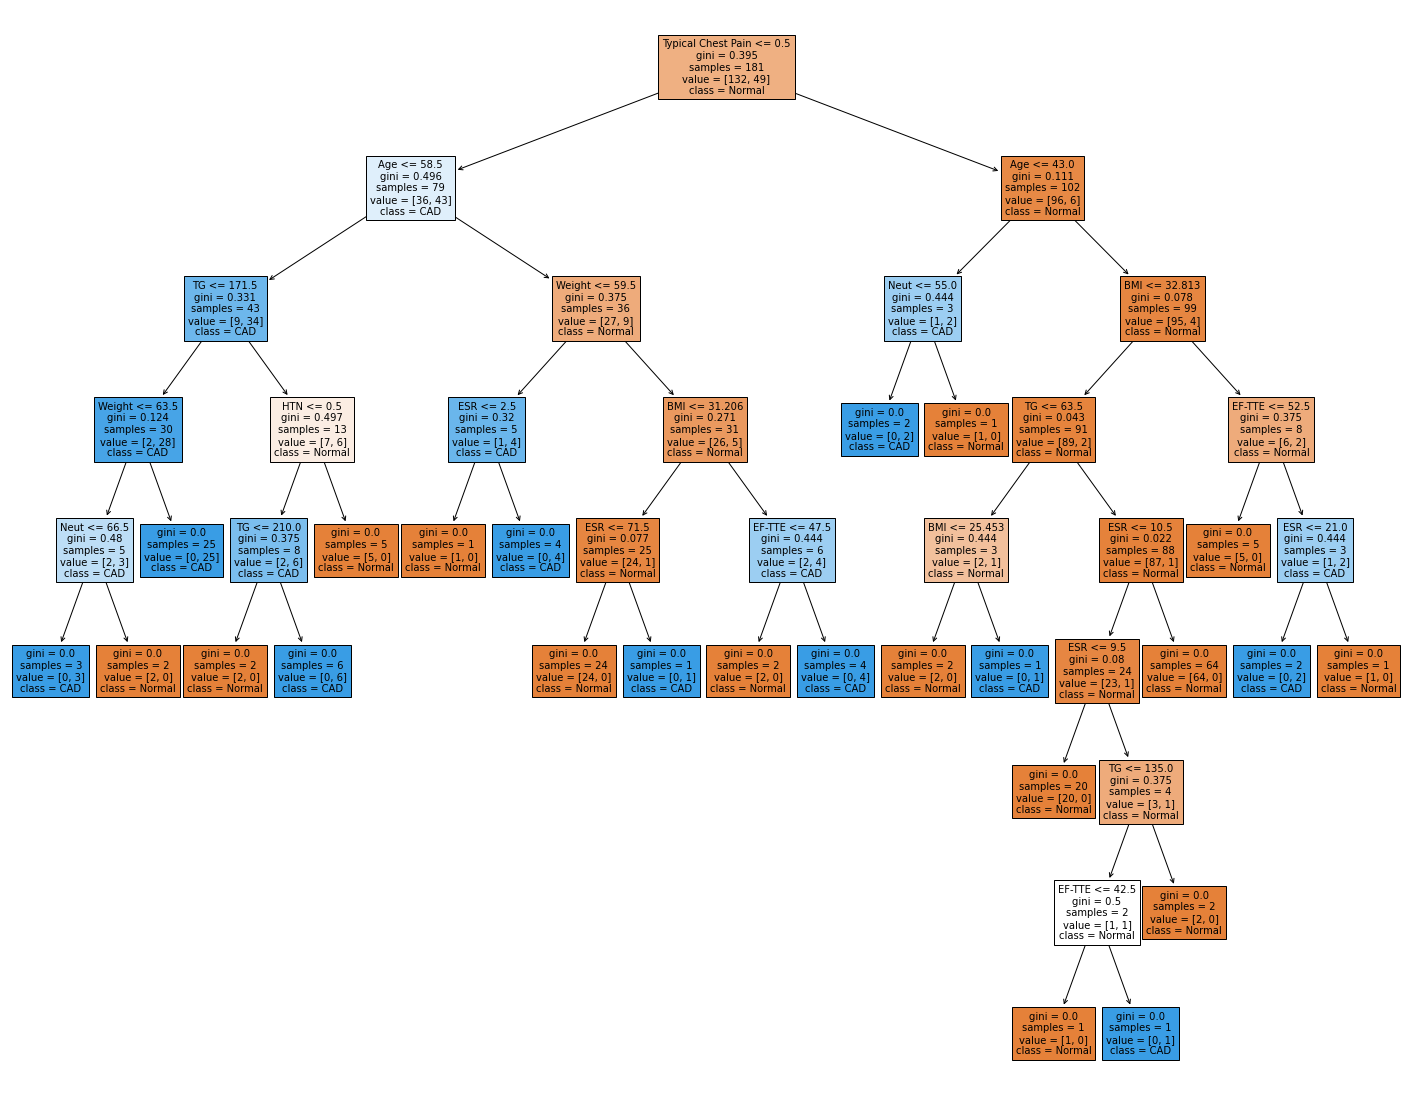

In [22]:
from sklearn import tree

fn = ['Age', 'Weight', 'BMI', 'DM', 'HTN', 'BP', 'Typical Chest Pain',
       'Atypical', 'Nonanginal', 'Tinversion', 'TG', 'ESR', 'Neut', 'EF-TTE',
       'Region RWMA']
cn = ['Normal', 'CAD']
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, feature_names = fn, class_names = cn, filled = True, fontsize=10)
plt.show()
fig.savefig("Classify 60-40.png")

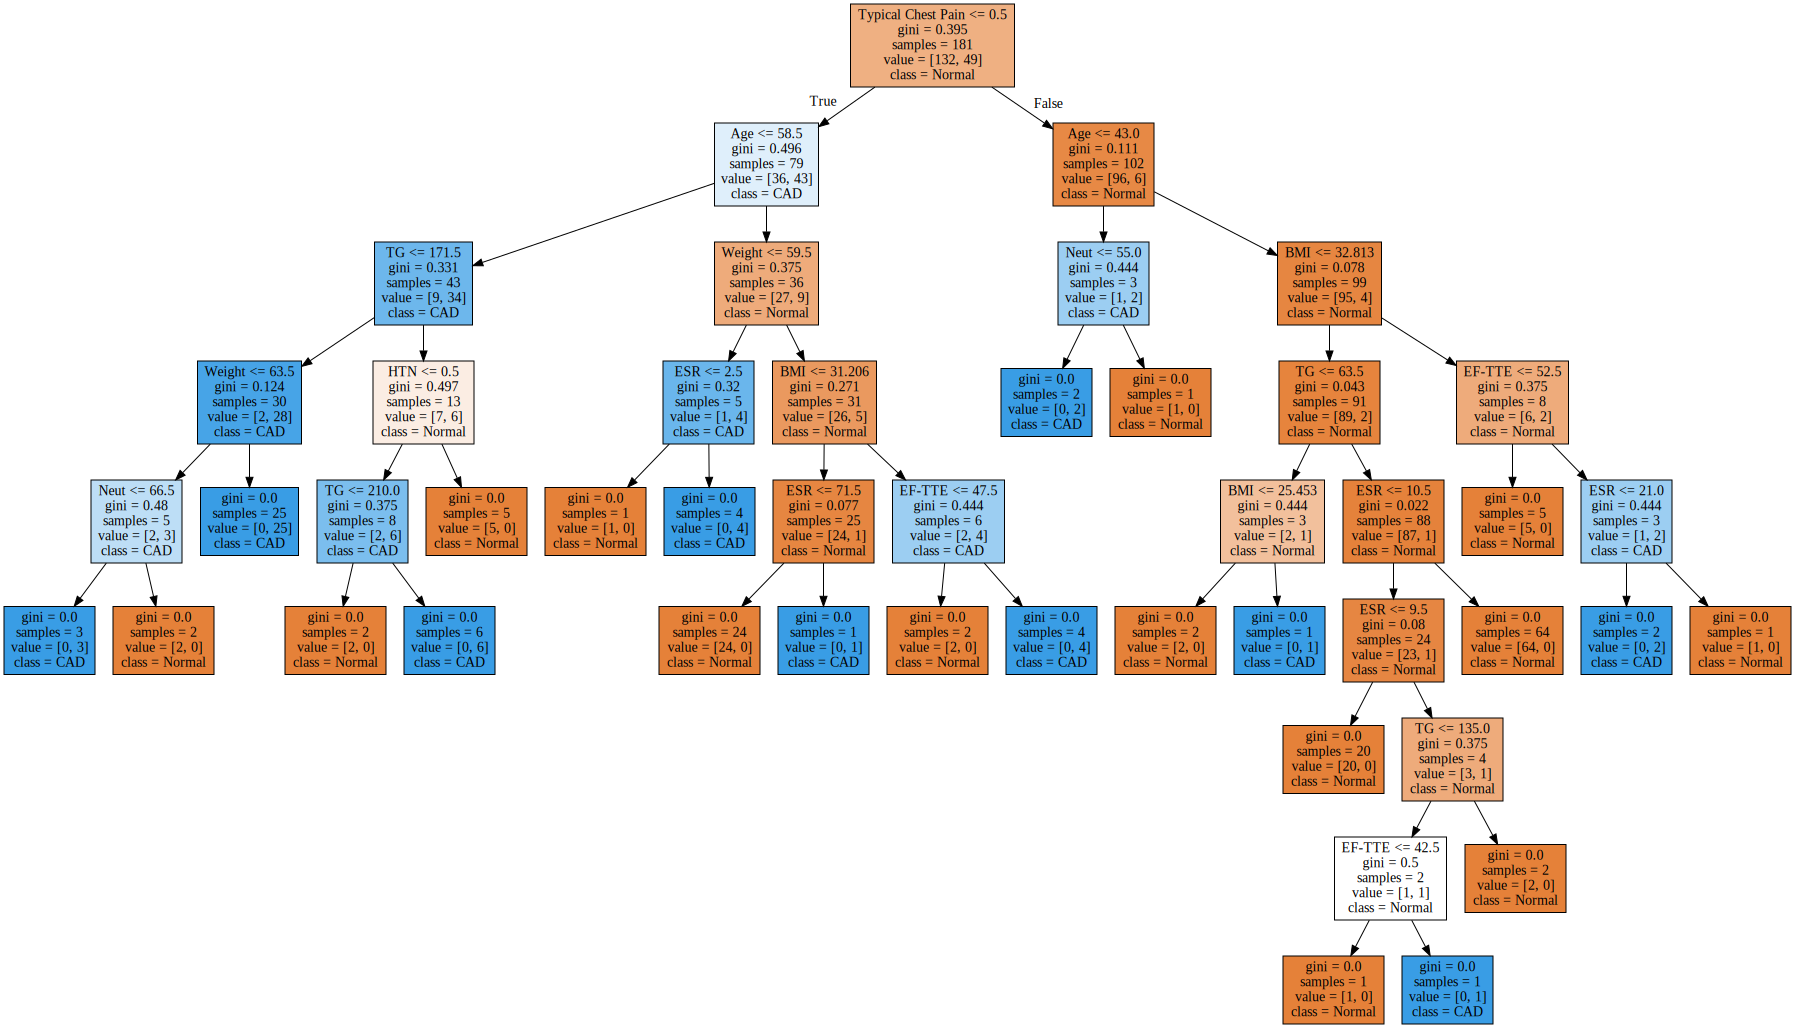

In [23]:
import graphviz
dot_data = tree.export_graphviz(clf, feature_names = fn, class_names = cn, filled = True)
graph = graphviz.Source(dot_data)
graph

In [24]:
# Test Accuracy
from sklearn.metrics import accuracy_score

accuracy_training = accuracy_score(labels_train, pred_training)
accuracy = accuracy_score(labels_test, pred)

print('Accuracy on the training data:', accuracy_training)
print('Accuracy on the testing data:', accuracy)

Accuracy on the training data: 1.0
Accuracy on the testing data: 0.6967213114754098


In [25]:
# Precision and Recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the confusion matrix
print(confusion_matrix(labels_test, pred))

# Print the precision and recall, among other metrics
print(classification_report(labels_test, pred, digits=5))

[[61 23]
 [14 24]]
              precision    recall  f1-score   support

           0    0.81333   0.72619   0.76730        84
           1    0.51064   0.63158   0.56471        38

    accuracy                        0.69672       122
   macro avg    0.66199   0.67888   0.66600       122
weighted avg    0.71905   0.69672   0.70419       122



## Decision Tree Model 80:20

In [26]:
# Decision Tree
from sklearn.model_selection import train_test_split

# 80:20 Train Test Ratio
features_train, features_test, labels_train, labels_test = train_test_split(df_features, df_labels, test_size=0.2, random_state=0)

print(features_train.shape)
print(features_test.shape)

(242, 15)
(61, 15)


In [27]:
from sklearn.tree import DecisionTreeClassifier

# Make the decision tree model
clf = DecisionTreeClassifier(criterion='gini')

# Fit model to training and testing data
clf.fit(features_train, labels_train)

# Do predictions on the training data
pred_training = clf.predict(features_train)

# Do predictions on the testing data
pred = clf.predict(features_test)

print(pred_training)
print(pred)

[0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0
 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0]
[0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]


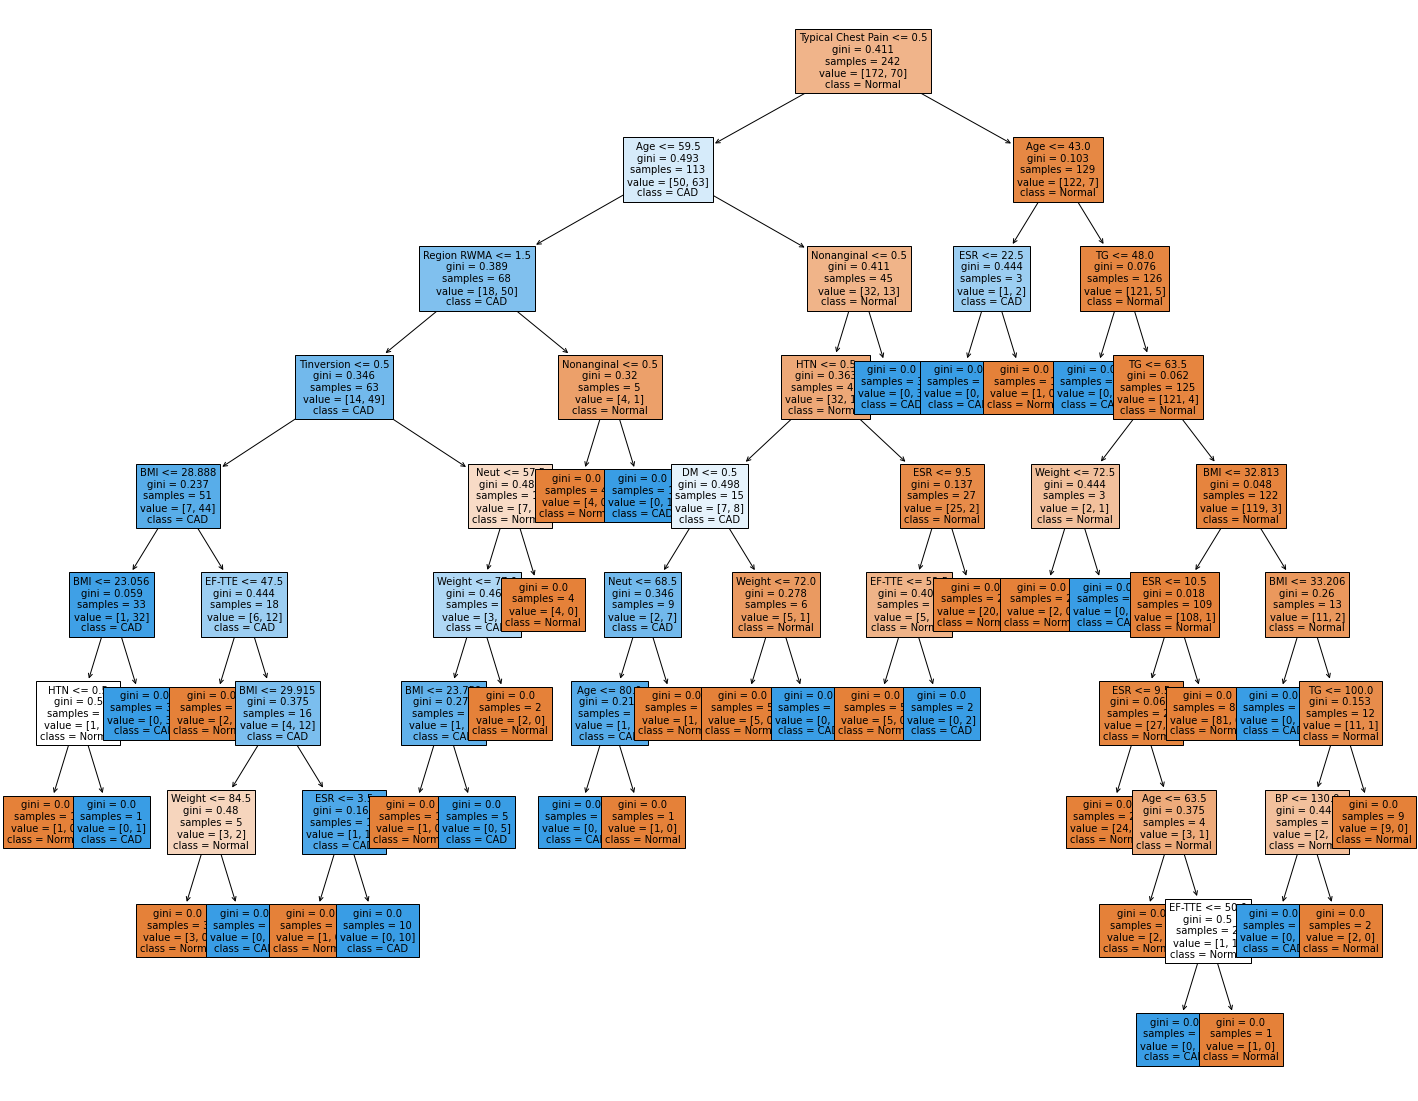

In [28]:
from sklearn import tree

fn = ['Age', 'Weight', 'BMI', 'DM', 'HTN', 'BP', 'Typical Chest Pain',
       'Atypical', 'Nonanginal', 'Tinversion', 'TG', 'ESR', 'Neut', 'EF-TTE',
       'Region RWMA']
cn = ['Normal', 'CAD']
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, feature_names = fn, class_names = cn, filled = True, fontsize=10)
plt.show()
fig.savefig("Classify 80-20.png")

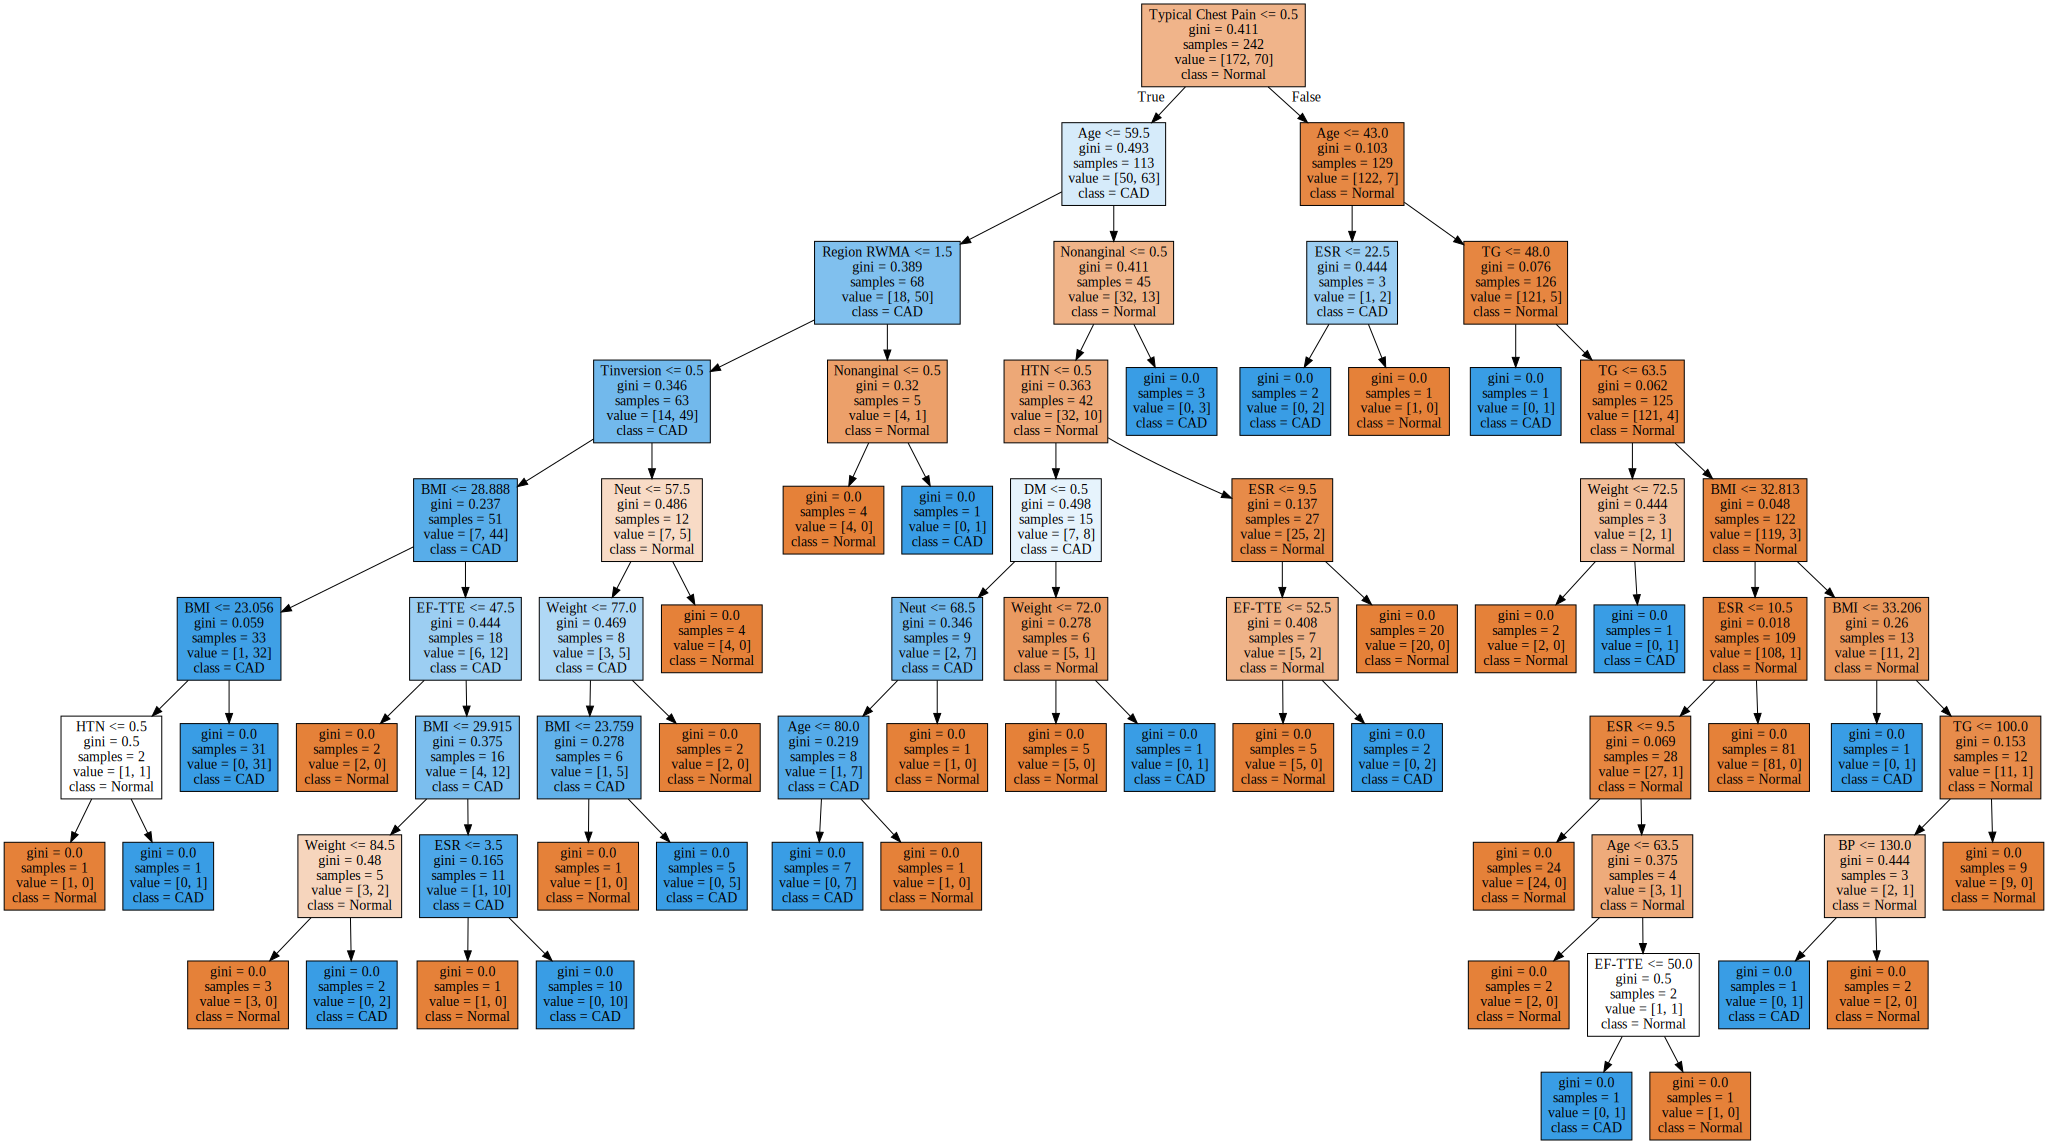

In [29]:
import graphviz
dot_data = tree.export_graphviz(clf, feature_names = fn, class_names = cn, filled = True)
graph = graphviz.Source(dot_data)
graph

In [30]:
# Test Accuracy
from sklearn.metrics import accuracy_score

accuracy_training = accuracy_score(labels_train, pred_training)
accuracy = accuracy_score(labels_test, pred)

print('Accuracy on the training data:', accuracy_training)
print('Accuracy on the testing data:', accuracy)

Accuracy on the training data: 1.0
Accuracy on the testing data: 0.8360655737704918


In [31]:
# Precision and Recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the confusion matrix
print(confusion_matrix(labels_test, pred))

# Print the precision and recall, among other metrics
print(classification_report(labels_test, pred, digits=5))

[[39  5]
 [ 5 12]]
              precision    recall  f1-score   support

           0    0.88636   0.88636   0.88636        44
           1    0.70588   0.70588   0.70588        17

    accuracy                        0.83607        61
   macro avg    0.79612   0.79612   0.79612        61
weighted avg    0.83607   0.83607   0.83607        61



# Analisis
## Advantages
1. Dibandingkan dengan algoritma lain, membutuhkan lebih sedikit pre-processing
2. Missing values tidak memengaruhi proses pembuatan decision tree
## Disadvantages
1. Perubahan kecilpun akan menyebabkan perubahan besar pada struktur decision tree dan menyebabkan ketidakstabilan
2. Kalkulasinya bisa jauh lebih kompleks dibandingkan dengan algoritma lain
3. Membutuhkan waktu lebih untuk melatih modelnya
## Improvements
Dilihat dari percobaan di atas, pembagian train test dengan rasio 60:40 menghasilkan precision, recall, dan f1-score yang kurang, dan ditemukan bahwa prediksi untuk kategori normal jauh lebih tinggi dibandingkan dengan prediksi kategori CAD. Namun, dengan menggunakan rasio 80:20, terjadi peningkatan di kedua kategori, dan peningkatan signifikan pada pendeteksian kategori CAD. Dilihat dari sana dapat dilihat bahwa dengan training data yang lebih banyak dapat melatih model untuk mendeteksi model dengan lebih akurat.